In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv")

data = np.array(data)

print(data.shape)

(42000, 785)


In [4]:
# data = data.flatten()
y = data[:, 0].T
x = data[:, 1:].T
print(x.shape)
print(y.shape)

(784, 42000)
(42000,)


In [5]:
def img_show(x, y):
    # Matrix visualization
    img = x.reshape((28,28))
    plt.imshow(img, cmap="gray")
    print(f"This is {y}")

(784, 3000)
This is 0


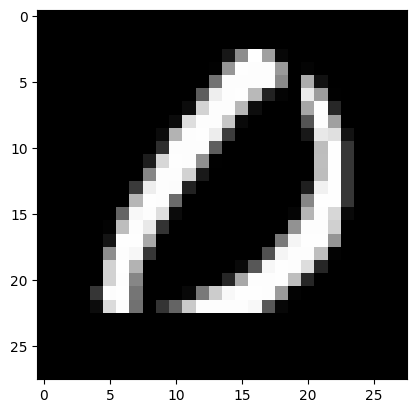

In [6]:
def split(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Xtest, Ytrain, Ytest) 
n = 3000
x_train, x_test, y_train, y_test = split(x, y, n)
print(x_train.shape)
img_show(x_train[:, 0], y_train[0])

In [7]:
centroid = np.mean(x_train, axis=1)
centroid = np.reshape(centroid, (len(centroid), 1))

x_centered = x_train - centroid

# Compute svd
u, s, vh = np.linalg.svd(x_centered)


In [8]:

k = 2
u_truncated = np.resize(u, (x_centered.shape[0], k))

Z = np.dot(u_truncated.T, x_centered)

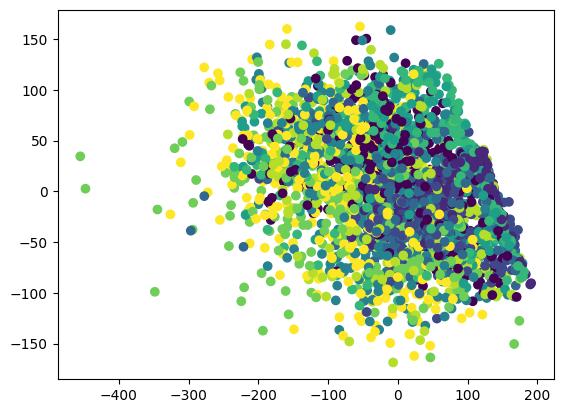

In [9]:
plt.scatter(Z[0, :], Z[1, :], c=y_train)

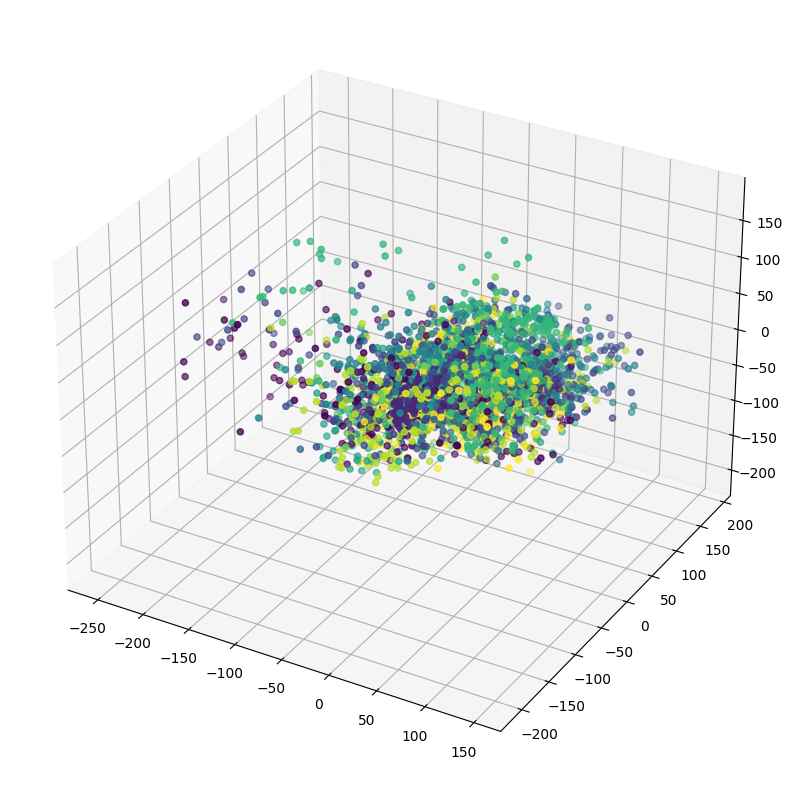

In [10]:

k = 3
u_truncated = np.resize(u, (x_centered.shape[0], k))

Z = np.dot(u_truncated.T, x_centered)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')



ax.scatter(Z[0, :], Z[1, :], Z[2, :],  c=y_train)


In [11]:
def truncated_svd(X, k):
    m, n = X.shape
    u, s, vh = np.linalg.svd(x_centered)
    u = np.resize(u, (m, k))
    s = np.resize(s, (k, m))
    vh = np.resize(vh, (m, k))

    return u @ s @ vh

def truncated2(X, k):
    m, n = X.shape
    u, s, vh = np.linalg.svd(x_centered)
    X_truncated = np.zeros((m, n))
    for i in range(k+1):
        X_truncated = s[i] * (np.outer(u[:, i], vh[i, :])) + X_truncated
    return X_truncated

X_truncated = truncated2(x_centered, 2)
print(X_truncated)

[[-7.17715437e-15 -1.48979597e-14 -1.73010697e-14 ...  1.84583149e-14
   4.36405086e-16 -3.35626387e-14]
 [-2.41678122e-13 -1.77700344e-13  3.37888265e-15 ...  8.21766285e-14
   9.28500434e-14  6.10902977e-14]
 [ 4.84278717e-14  2.27805689e-14 -6.35519873e-14 ...  2.68608176e-14
  -7.90517333e-15 -6.58353934e-14]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


# LDA

(42000, 785)
(784, 42000)
(42000,)


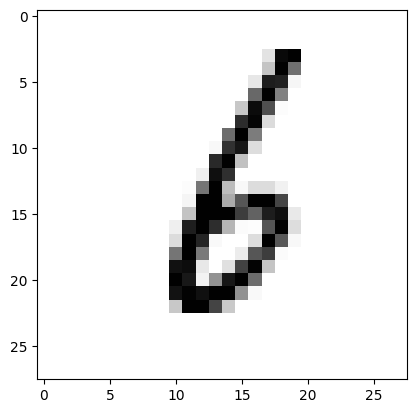

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("data.csv")

data = np.array(data)

print(data.shape)


# data = data.flatten()
y = data[:, 0].T
x = data[:, 1:].T
print(x.shape)
print(y.shape)

# x0 = [x[i, :] for i, k in enumerate(y) if k == 0]
I1 = (y==0)
I2 = (y==6)
I3 = (y==9)

X1 = x[:, I1]
X2 = x[:, I2]
X3 = x[:, I3]

Y1 = y[I1]
Y2 = y[I2]
Y3 = y[I3]

plt.imshow(np.reshape(X2[:, 20], (28,28)), cmap="Greys")


In [13]:
X = np.concatenate((X1, X2, X3), axis=1)
Y = np.concatenate((Y1, Y2, Y3))
d, N = X.shape

print(X.shape)

(784, 12457)


In [14]:
def centroid(X):
    centroid = np.mean(X, axis=1)
    centroid = np.reshape(centroid, (len(centroid), 1))
    return centroid

K1 = X1 - centroid(X1)
K2 = X2 - centroid(X2)
K3 = X3 - centroid(X3)

W = np.concatenate((K1, K2, K3), axis=1)
Sw = W@W.T

print(Sw.shape)

(784, 784)


(784, 784)


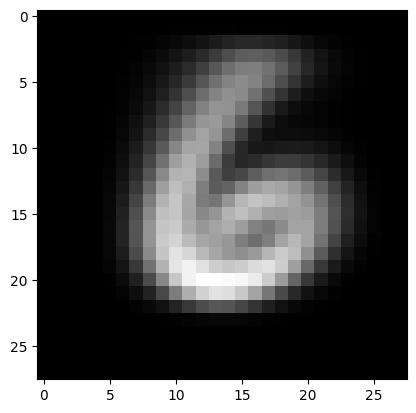

In [15]:
centroids1 = np.full((d, N), centroid(X1))
centroids2 = np.full((d, N), centroid(X2))
centroids3 = np.full((d, N), centroid(X3))

centroids = np.concatenate((centroids1, centroids2, centroids3), axis=1) 
centroids = centroids - centroid(X)

Sb = centroids@centroids.T
print(Sb.shape)

plt.imshow(centroids2[:, 1].reshape((28,28)), cmap="gray")

In [32]:
try:
    L = np.linalg.cholesky(Sw)
except:
    eps = 1e-6
    Sw = Sw + eps*np.identity(len(Sw))
finally:
    L = np.linalg.cholesky(Sw)


(2, 12457)


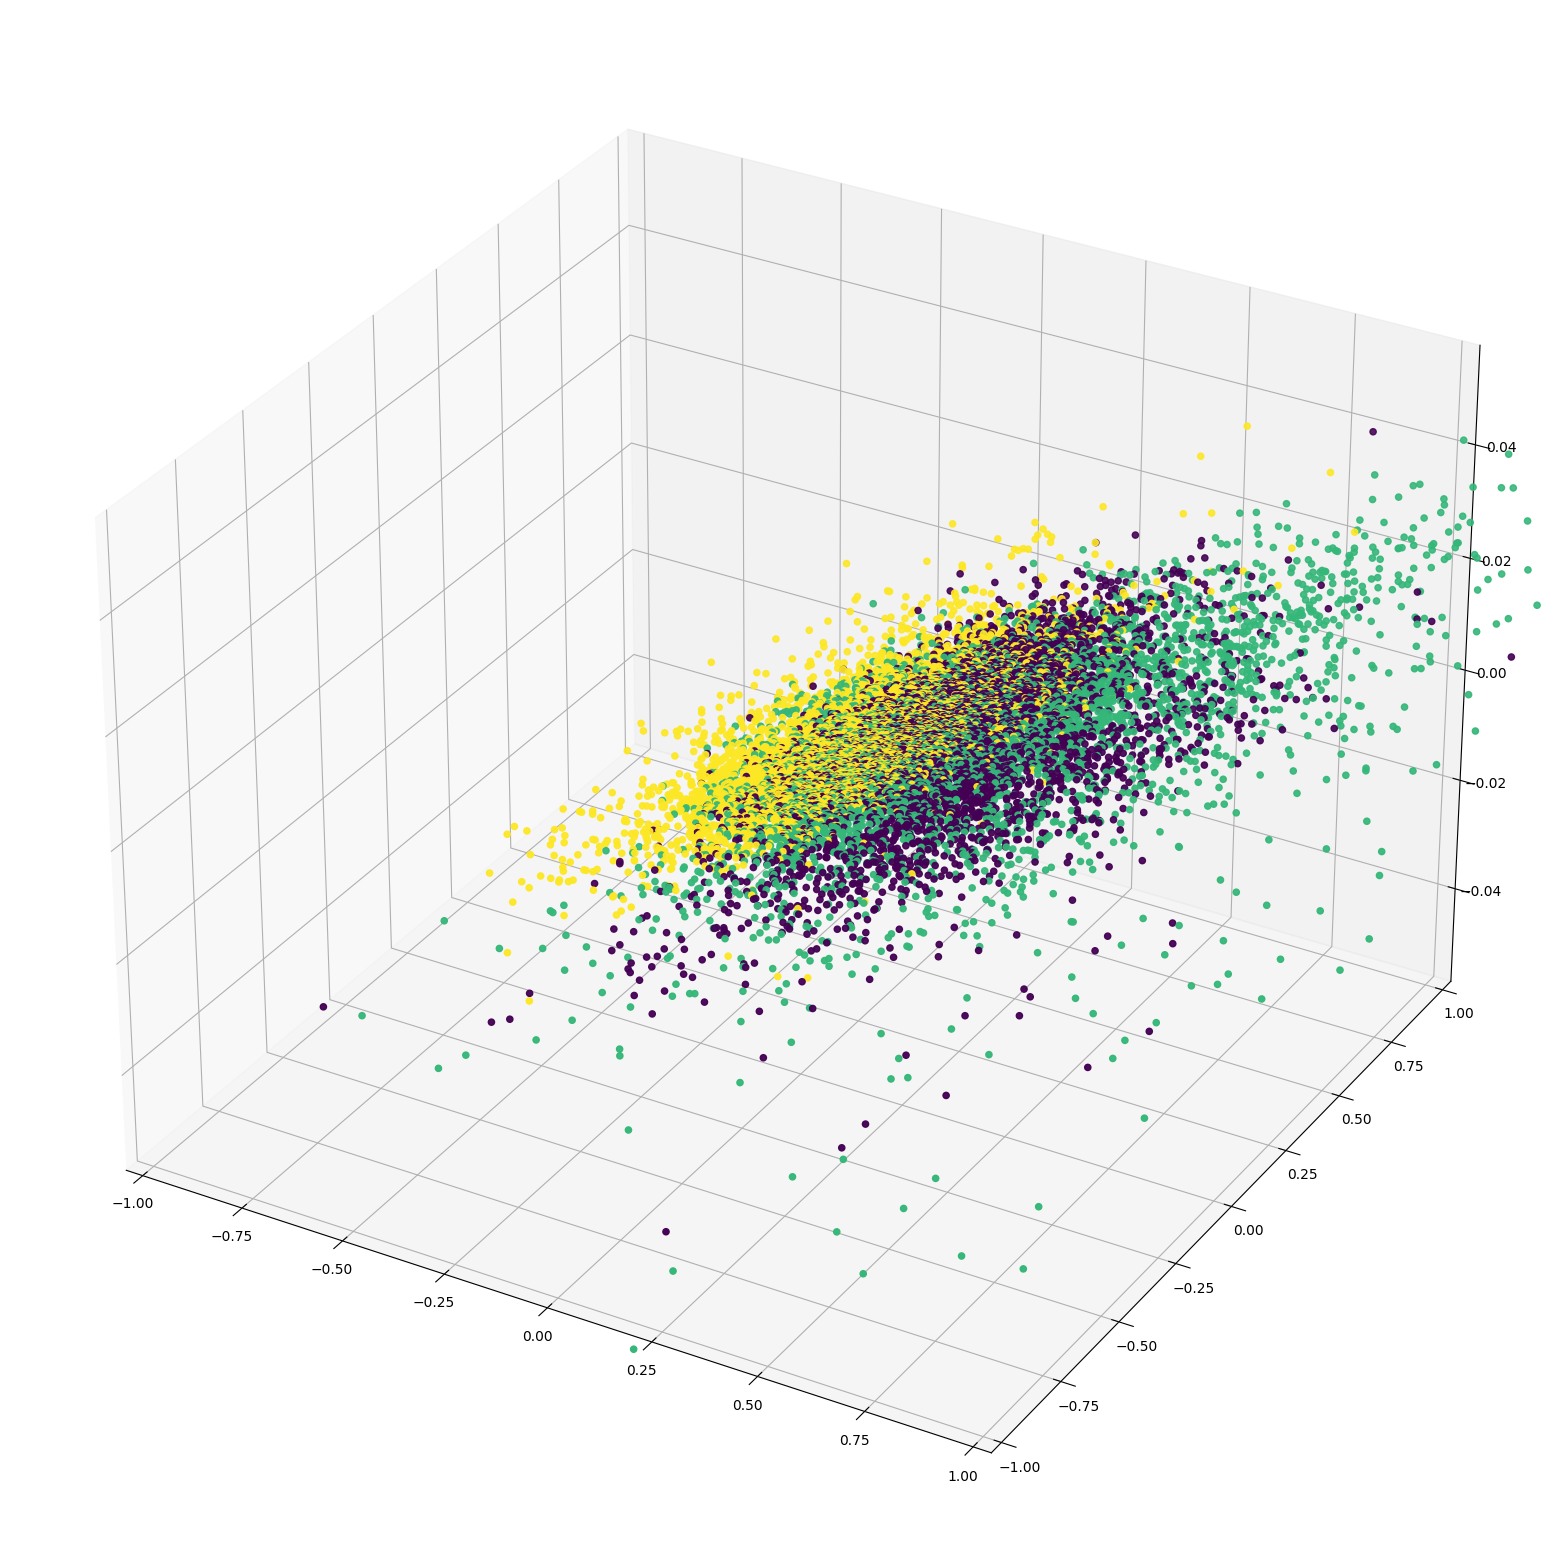

In [44]:
import scipy as sp

k = 2

eigens, v = sp.sparse.linalg.eigs(np.linalg.inv(L.T)@Sb@L.T, k)
v = np.real(v)


W = np.full((d, k), v)
Q = np.linalg.inv(L)@W

Z = Q.T@X

print(Z.shape)


figure = plt.figure(figsize=(20, 20))
ax = plt.subplot(projection="3d")

plt.xlim(-1, 1)
plt.ylim(-1, 1)

ax.scatter(Z[0, :], Z[1, :], c=Y)

